In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
# Recreate a DatetimeIndex with a specific frequency

freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)

prices = np.sin(unix_dates)

data = pd.DataFrame({'ds': date_rng, 'y': prices})

Доминирующая частота (период) в данных: 78.36 дней


C:\Users\Skiv2\AppData\Local\Temp\ipykernel_11800\3726665425.py:5: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / fft_freq  # Преобразование частоты в период


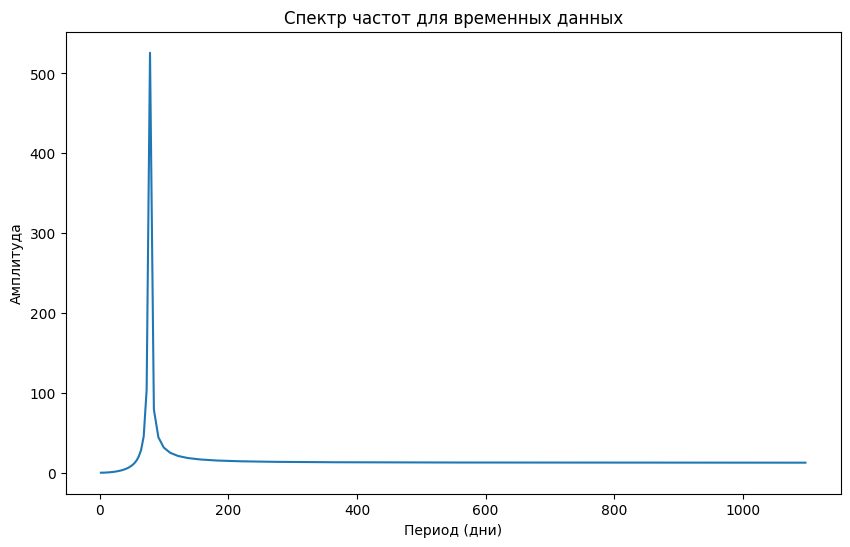

In [2]:
# Выполните преобразование Фурье
fft_result = np.fft.fft(prices)
fft_freq = np.fft.fftfreq(len(prices))
magnitude = np.abs(fft_result)
periods = 1 / fft_freq  # Преобразование частоты в период

# Отбросьте отрицательные частоты и нулевую частоту
positive_mask = fft_freq > 0
fft_freq = fft_freq[positive_mask]
magnitude = magnitude[positive_mask]
periods = periods[positive_mask]

# Найдите наиболее значимую частоту
max_frequency_index = np.argmax(magnitude)
dominant_period = periods[max_frequency_index]

# Выведите результаты
print(f"Доминирующая частота (период) в данных: {dominant_period:.2f} дней")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(periods, magnitude)
plt.xlabel("Период (дни)")
plt.ylabel("Амплитуда")
plt.title("Спектр частот для временных данных")
plt.show()

In [3]:
prices_diff = np.diff(prices)

In [4]:
len(prices)

1097

In [5]:
len(prices_diff)

1096

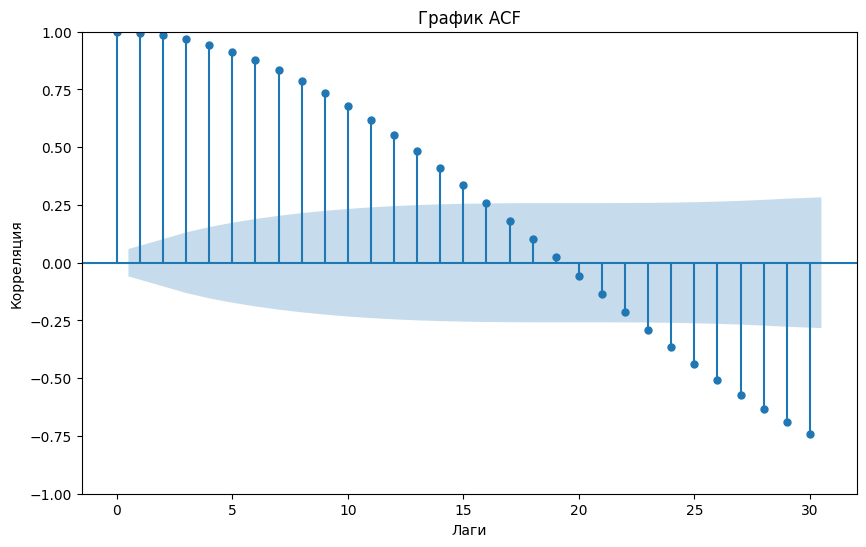

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


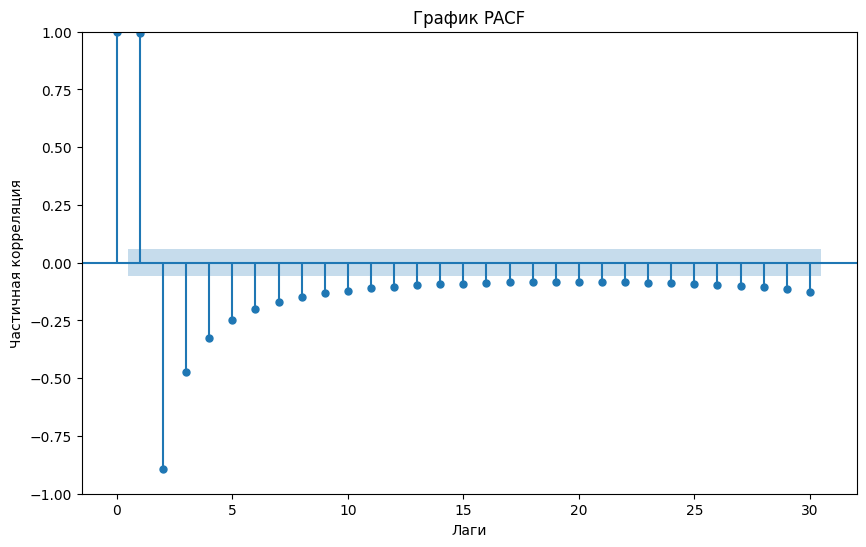

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
# Построение графика автокорреляционной функции (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(prices, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.title('График ACF')
plt.show()
# Построение графика частичной автокорреляционной функции (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(prices, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Частичная корреляция')
plt.title('График PACF')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(prices)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.6590239738327134e+16
p-value: 0.0


In [8]:
train_size = int(len(prices) * 0.7)
test_size = len(prices) - train_size

In [9]:
model_data = pd.DataFrame({'Price': prices[0:train_size], 'Date': date_rng[1:train_size + 1]})
model_data = model_data.set_index('Date', inplace = False)
model_data.head(10)

,Price
Date,
2019-01-02,-0.885371
2019-01-03,-0.920145
2019-01-04,-0.948861
2019-01-05,-0.971331
2019-01-06,-0.987407
2019-01-07,-0.996982
2019-01-08,-0.999994
2019-01-09,-0.996423
2019-01-10,-0.986292


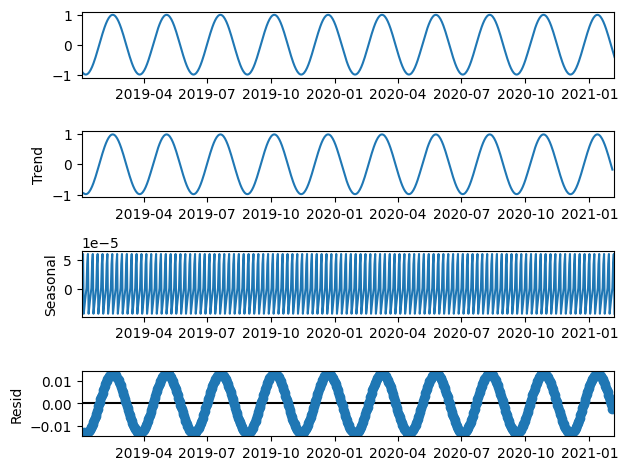

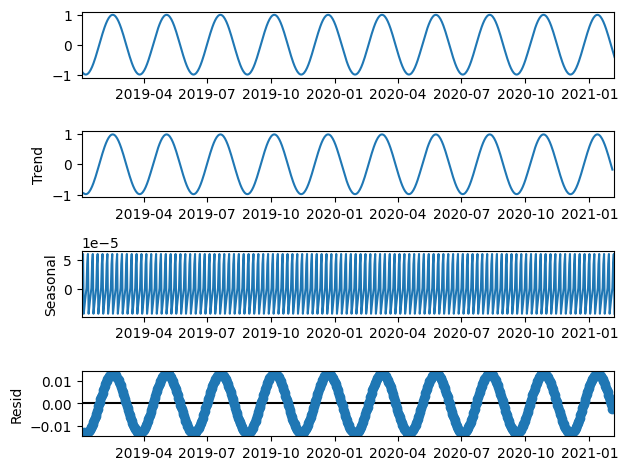

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(model_data, model = "add")
a.plot()

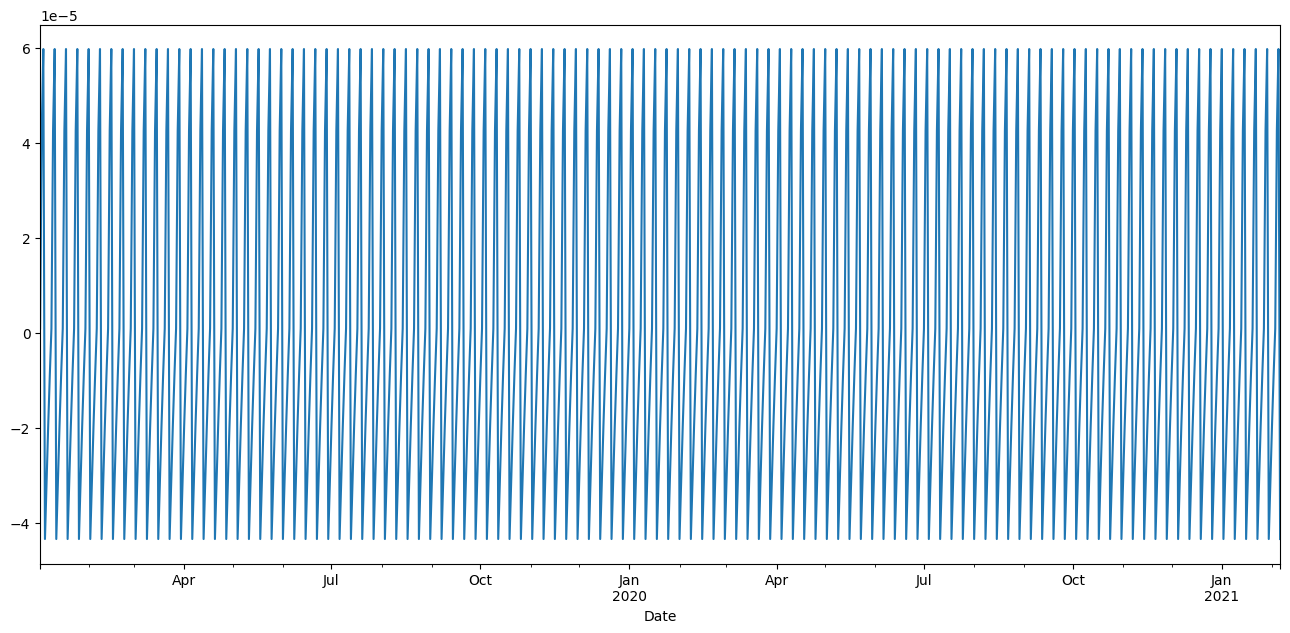

In [11]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [12]:
# Выполните декомпозицию временного ряда для определения тренда и остатков
result = seasonal_decompose(model_data, period=78)

# Определите сезонный порядок на основе результатов декомпозиции
seasonal_order = (result.seasonal[0], result.seasonal[1], result.seasonal[2], 78)

In [13]:
seasonal_order

(-0.9741552534060719, -0.9908172403102775, -1.0009869328053678, 78)

In [19]:
#Importing the module
import pmdarima as pmd

arima_model = pmd.auto_arima(model_data["Price"], seasonal = False,
                              max_p = 7, max_d = 4, max_q = 7, max_P = 4, max_D = 4, max_Q = 4,
                              test = "pp", supress_warnings = True,
                              trace = True)

#Summary of the model
arima_model.summary()

Performing stepwise search to minimize aic


C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,4,2)(0,0,0)[0]             : AIC=0.996, Time=1.52 sec
 ARIMA(0,4,0)(0,0,0)[0]             : AIC=-13738.489, Time=0.58 sec
 ARIMA(1,4,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,4,1)(0,0,0)[0]             : AIC=-13689.694, Time=1.07 sec
 ARIMA(1,4,1)(0,0,0)[0]             : AIC=-13120.038, Time=1.41 sec
 ARIMA(0,4,0)(0,0,0)[0] intercept   : AIC=-13593.732, Time=4.43 sec

Best model:  ARIMA(0,4,0)(0,0,0)[0]          
Total fit time: 9.324 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  767
Model:               SARIMAX(0, 4, 0)   Log Likelihood                6870.244
Date:                Mon, 21 Aug 2023   AIC                         -13738.489
Time:                        10:29:06   BIC                         -13733.851
Sample:                    01-02-2019   HQIC                        -13736.703
                         - 02-06-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.602e-09   1.79e-10      8.950      0.000    1.25e-09    1.95e-09
===================================================================================
Ljung-Box (L1) (Q):                 755.18   Jarque-Bera (JB):                69.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.03
Prob(H) (two-sided):                  0.72   Kurtosis:                         1.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(model_data["Price"], order = (0,5,0))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  767
Model:               SARIMAX(0, 5, 0)   Log Likelihood                7906.936
Date:                Mon, 21 Aug 2023   AIC                         -15811.872
Time:                        10:28:26   BIC                         -15807.236
Sample:                    01-02-2019   HQIC                        -15810.087
                         - 02-06-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.726e-10    7.5e-11      4.965      0.000    2.26e-10     5.2e-10
===================================================================================
Ljung-Box (L1) (Q):                 724.35   Jarque-Bera (JB):                69.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.99   Kurtosis:                         1.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
arima_pred = arima_result.predict(start = len(model_data), end = len(prices)-1, typ="levels")
arima_pred

2021-02-07      -0.483290
2021-02-08      -0.552659
2021-02-09      -0.618364
2021-02-10      -0.679944
2021-02-11      -0.736951
                 ...     
2021-12-29   -2966.530827
2021-12-30   -3012.549659
2021-12-31   -3059.078154
2022-01-01   -3106.119946
2022-01-02   -3153.678678
Freq: D, Name: predicted_mean, Length: 330, dtype: float64

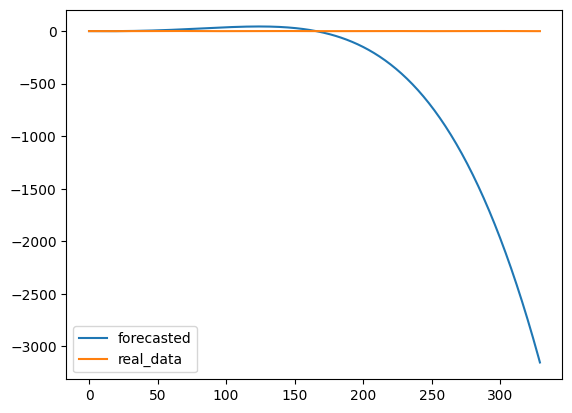

In [17]:
plt.plot(arima_pred.values, label = "forecasted")
plt.plot(prices[train_size:], label = "real_data")
plt.legend()

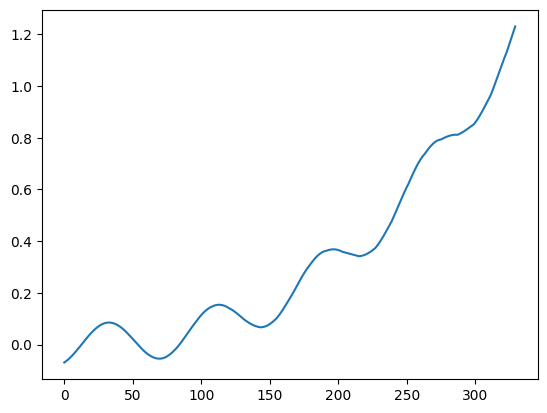

In [39]:
plt.plot(arima_pred.values, label = "forecasted")